## Import Clustering Libs and clustered-Processed-Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier


## Data Cheaking and splitting for training

In [4]:
data = pd.read_csv("../data/clustered_Data.csv")

In [5]:
data = data.reset_index(drop=True)

In [6]:
data.columns

Index(['Unnamed: 0', 'PdDistrict', 'X', 'Y', 'Hour', 'Month', 'day',
       'count_days', 'Clusters'],
      dtype='object')

In [7]:
Train = data.drop(columns=['Clusters'])
Test = data['Clusters']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(Train, Test, test_size=0.2, random_state=42)

## Classification Models

### First : Using DecisionTree

In [9]:
tree_clf=DecisionTreeClassifier(random_state=42)

param_grid = [
    {
        'criterion': ['gini', 'entropy', 'log_loss'],    
        'max_depth': [None, 5, 10, 20],                  
        'min_samples_split': [10, 50, 100],                 
        'min_samples_leaf': [5, 20, 50],                 
        'max_features': [None, 'sqrt', 'log2']           
    }
]

grid_search = GridSearchCV(tree_clf , param_grid , cv=5)

grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [None, 5, 10, 20],
                          'max_features': [None, 'sqrt', 'log2'],
                          'min_samples_leaf': [5, 20, 50],
                          'min_samples_split': [10, 50, 100]}])

In [ ]:
predict_class = grid_search.predict(x_test)

accuracy = accuracy_score(y_test, predict_class)
print("Test Accuracy:", accuracy)

print("Predicted classes:")
print(predict_class)
print("Predicted classes:")
print(np.array(y_test))

Test Accuracy: 0.966
Predicted classes:
[0 2 0 ... 1 2 2]
Predicted classes:
[0 2 0 ... 1 2 2]


### Second : Using RandomForest

In [11]:
rnd_clf=RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100 ,400],
    'max_depth': [None, 10 , 50 ,70],
    'min_samples_split': [2, 5 ,10],
    'min_samples_leaf': [1, 2 ,4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(rnd_clf, param_grid, cv=5, scoring='accuracy', n_jobs = -1)

grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)

best_tree_model = grid_search.best_estimator_

Best parameters: {'bootstrap': True, 'max_depth': 70, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 400}


In [12]:
predict_class = grid_search.predict(x_test)

accuracy = accuracy_score(y_test, predict_class)
print("Test Accuracy:", accuracy)

print("Predicted classes:")
print(predict_class)
print("Predicted classes:")
print(np.array(y_test))

Test Accuracy: 0.9802
Predicted classes:
[0 2 0 ... 1 2 2]
Predicted classes:
[0 2 0 ... 1 2 2]


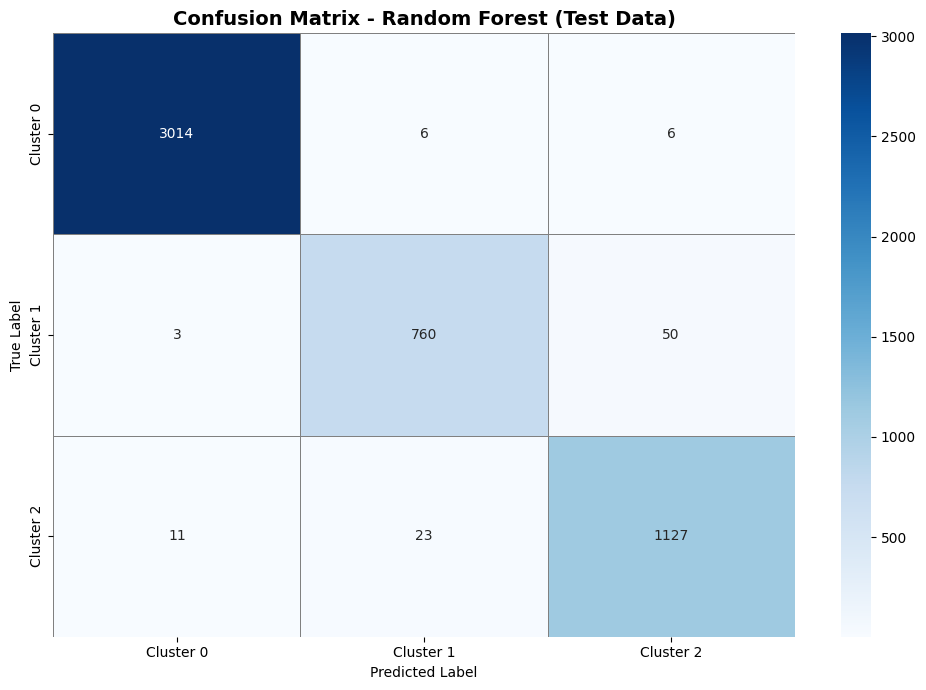

In [13]:
cm = confusion_matrix(y_test, predict_class)
labels = [f"Cluster {i}" for i in range(cm.shape[0])]
plt.figure(figsize=(10, 7))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels,
    linewidths=0.5,
    linecolor='gray'
)
plt.title("Confusion Matrix - Random Forest (Test Data)", fontsize=14, weight='bold')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()